In [9]:
# Importamos las librerías necesarias para el análisis y el modelo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [10]:
# Cargar el dataset del Titanic
df = sns.load_dataset("titanic")

# Mostrar las primeras filas
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# Preprocesamiento de datos
df = df.drop(columns=["embark_town", "deck", "alive", "class", "who", "adult_male", "alone"])  # Quitamos columnas que no usaremos
df = df.dropna()  # Eliminamos filas con datos faltantes para evitar errores

# Codificar variables categóricas (convertir texto a números para el modelo)
df["sex"] = df["sex"].map({"male": 0, "female": 1})  # 'male' será 0 y 'female' será 1
df["embarked"] = df["embarked"].map({"C": 0, "Q": 1, "S": 2})  # 'C', 'Q', 'S' a 0, 1, 2


In [12]:
# Separamos las variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["survived"])
y = df["survived"]

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo Random Forest
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Mostramos la precisión del modelo en los datos de prueba
y_pred = modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7622377622377622


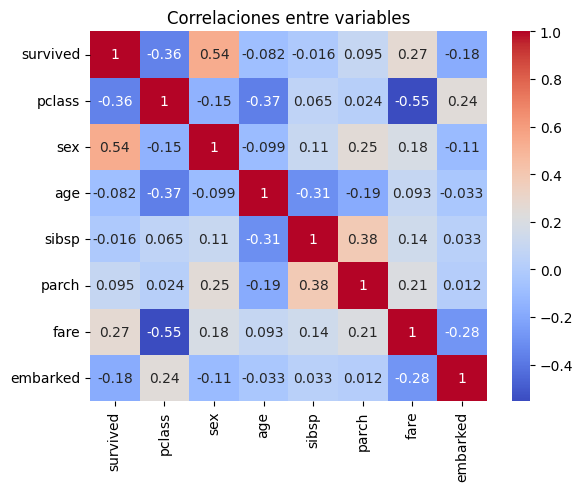

In [13]:
# Mapa de calor de correlaciones entre variables
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables")
plt.show()

In [14]:
# Lista de pasajeros de ejemplo para predecir si sobreviven o no
# Cada pasajero es una lista con: [clase, sexo, edad, hermanos/padres, hijos, tarifa, puerto de embarque]
pasajeros = [
    [3, "male", 22, 0, 0, 7.25, "S"],
    [1, "female", 38, 1, 0, 71.2833, "C"],
    [3, "female", 26, 0, 0, 7.925, "S"],
    [1, "male", 54, 0, 1, 51.8625, "S"],
    [3, "male", 2, 4, 1, 21.075, "S"],
    [2, "female", 27, 1, 0, 21.0, "S"],
    [2, "male", 19, 0, 0, 13.0, "S"],
    [1, "female", 4, 1, 1, 120.0, "C"],
    [3, "male", 35, 0, 0, 8.05, "S"],
    [2, "female", 45, 0, 0, 26.0, "Q"],
]


In [15]:
# Función para predecir la supervivencia de una lista de pasajeros
def predecir_supervivencia_lista_pasajeros(pasajeros):
    # Codificar todos los pasajeros de golpe (convertir texto a números)
    codificados = []
    for p in pasajeros:
        pclass, sex, age, sibsp, parch, fare, embarked = p
        sex_code = 0 if sex.lower() == "male" else 1  # 'male' a 0, 'female' a 1
        embarked_code = {"C": 0, "Q": 1, "S": 2}.get(embarked.upper(), 2)  # 'C', 'Q', 'S' a 0, 1, 2
        codificados.append([pclass, sex_code, age, sibsp, parch, fare, embarked_code])

    # Crear DataFrame con nombres de columnas para evitar warnings
    df_pasajeros = pd.DataFrame(codificados, columns=X.columns)

    # Hacer predicciones en lote (todos los pasajeros a la vez)
    predicciones = modelo.predict(df_pasajeros)
    probabilidades = modelo.predict_proba(df_pasajeros)

    # Mostrar resultados de cada pasajero
    for i, (pred, proba) in enumerate(zip(predicciones, probabilidades), start=1):
        print(f"\n👤 Pasajero {i}:")
        print(f"→ ¿Sobrevive?: {'✅ SÍ' if pred == 1 else '❌ NO'}")
        print(f"   Probabilidades → Muere: {proba[0]*100:.2f}%, Sobrevive: {proba[1]*100:.2f}%")


In [16]:
# Llamamos a la función para predecir la supervivencia de los pasajeros de ejemplo
predecir_supervivencia_lista_pasajeros(pasajeros)


👤 Pasajero 1:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 97.00%, Sobrevive: 3.00%

👤 Pasajero 2:
→ ¿Sobrevive?: ✅ SÍ
   Probabilidades → Muere: 0.00%, Sobrevive: 100.00%

👤 Pasajero 3:
→ ¿Sobrevive?: ✅ SÍ
   Probabilidades → Muere: 33.00%, Sobrevive: 67.00%

👤 Pasajero 4:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 92.00%, Sobrevive: 8.00%

👤 Pasajero 5:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 77.00%, Sobrevive: 23.00%

👤 Pasajero 6:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 66.00%, Sobrevive: 34.00%

👤 Pasajero 7:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 100.00%, Sobrevive: 0.00%

👤 Pasajero 8:
→ ¿Sobrevive?: ✅ SÍ
   Probabilidades → Muere: 1.00%, Sobrevive: 99.00%

👤 Pasajero 9:
→ ¿Sobrevive?: ❌ NO
   Probabilidades → Muere: 100.00%, Sobrevive: 0.00%

👤 Pasajero 10:
→ ¿Sobrevive?: ✅ SÍ
   Probabilidades → Muere: 5.00%, Sobrevive: 95.00%
